In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import random
import cv2

array([[[201, 125,  66],
        [198, 122,  63],
        [197, 121,  62],
        ...,
        [248, 186, 132],
        [249, 187, 133],
        [249, 187, 133]],

       [[196, 120,  61],
        [200, 124,  65],
        [200, 124,  65],
        ...,
        [250, 189, 133],
        [251, 189, 135],
        [251, 190, 134]],

       [[202, 128,  70],
        [197, 123,  65],
        [195, 121,  63],
        ...,
        [251, 191, 132],
        [251, 190, 134],
        [252, 192, 133]],

       ...,

       [[ 34,  22,  12],
        [ 34,  22,  12],
        [ 34,  22,  12],
        ...,
        [ 36,  21,  12],
        [ 36,  21,  12],
        [ 36,  21,  12]],

       [[ 34,  22,  12],
        [ 34,  22,  12],
        [ 34,  22,  12],
        ...,
        [ 36,  21,  12],
        [ 36,  21,  12],
        [ 36,  21,  12]],

       [[ 34,  22,  12],
        [ 34,  22,  12],
        [ 34,  22,  12],
        ...,
        [ 35,  20,  11],
        [ 35,  20,  11],
        [ 35,  20,  11]]], dtype=uint8)
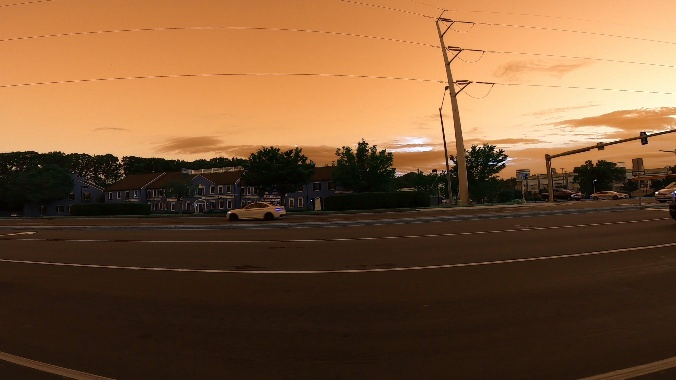

In [ ]:
def load_random_image(folder_path):
  image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
  if not image_files:
    print("No image files found in the specified folder.")
    return None

  random_image_file = random.choice(image_files)
  image_path = os.path.join(folder_path, random_image_file)

  try:
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error loading image: {image_path}")
        return None
    return img
  except Exception as e:
    print(f"An error occurred: {e}")
    return None
load_random_image("/content/drive/MyDrive/car objuectr detction yolo/data/training_images")

In [ ]:
import cv2
import os

def detect_cars(image_path, weights_path="yolov3.weights", cfg_path="yolov3.cfg", confidence_threshold=0.5):
        try:
        net = cv2.dnn.readNet(weights_path, cfg_path)
        classes = []
        with open("coco.names", "r") as f:
            classes = [line.strip() for line in f.readlines()]

        layer_names = net.getLayerNames()
        output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

        img = cv2.imread(image_path)
        height, width, channels = img.shape

        blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
        net.setInput(blob)
        outs = net.forward(output_layers)


        class_ids = []
        confidences = []
        boxes = []
        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > confidence_threshold and classes[class_id] == "car":  # Detect only cars
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)

                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    boxes.append([x, y, w, h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
        indexes = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, 0.4)

        font = cv2.FONT_HERSHEY_PLAIN
        for i in range(len(boxes)):
          if i in indexes:
              x, y, w, h = boxes[i]
              label = str(classes[class_ids[i]])
              cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
              cv2.putText(img, label, (x, y + 30), font, 3, (0, 255, 0), 3)

        cv2_imshow(img) # Assuming cv2_imshow is defined in your environment
    except Exception as e:
        print(f"Error during car detection: {e}")

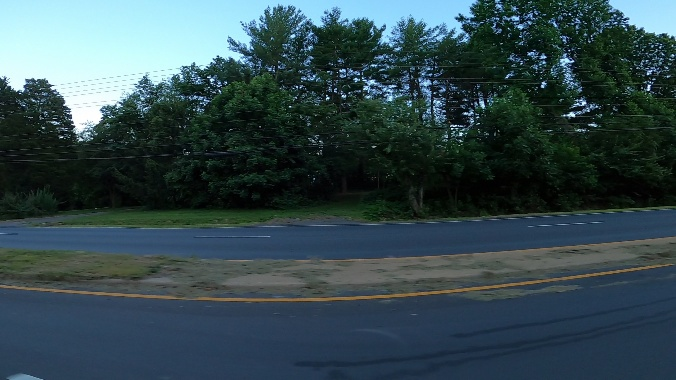

In [ ]:
# Example usage
image_folder = "/content/drive/MyDrive/car objuectr detction yolo/data/training_images/vid_4_10160.jpg"  # Replace with your folder path
detect_cars(image_folder)

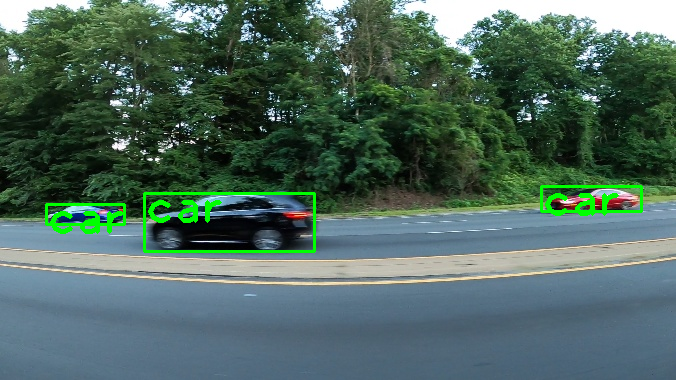

In [ ]:
image_folder = "/content/drive/MyDrive/car objuectr detction yolo/data/training_images/vid_4_1800.jpg"  # Replace with your folder path
detect_cars(image_folder)

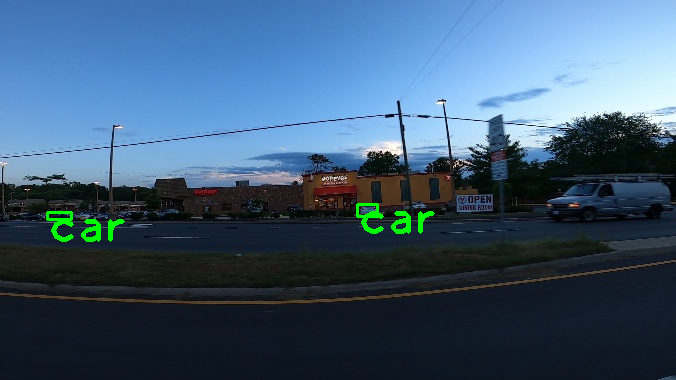

In [ ]:
image_folder = "/content/drive/MyDrive/car objuectr detction yolo/data/training_images/vid_4_17040.jpg"  # Replace with your folder path
detect_cars(image_folder)

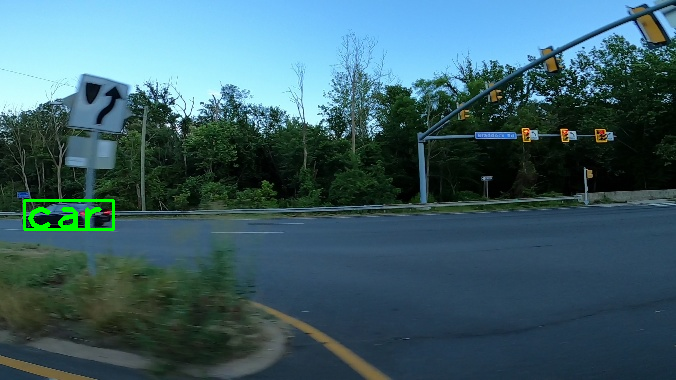

In [ ]:
image_folder = "/content/drive/MyDrive/car objuectr detction yolo/data/training_images/vid_4_620.jpg"  # Replace with your folder path
detect_cars(image_folder)